**author:** Alex Dawson-Elli  
**assignment:** Homework 1  
**due:** 2/2/2018



**Problem 1:**  solve the following linear program using Clp Ecos and SCS solvers. Compare the answers found by each solver

objective fxn:  
$5x_1 - x_2 + 11x_3$  

constraints:  
  $2x_1 ≥ x_2 + x_3$  
  $ ≤ x_j ≤ 3, j ∈ {1, 2, 3}$



we will define our problem statement in a modular function to keep code DRY

In [21]:
#define the problem, independent of solver used:
using JuMP, Clp, ECOS, SCS

"""setup a model given the supplied model type"""
function setup(m)
    @variable(m, 0 <= x₁ <= 3)          
    @variable(m, 0 <= x₂ <= 3)
    @variable(m, 0 <= x₃ <= 3) 
    @constraint(m,  x₂ + x₃ <= 2x₁)          
    @objective(m, Max, 5x₁ - x₂ + 11x₃)          
    return m
end

"""
profile code and display results:
"""
function profile(m)
    @time(for i = 1:1000 solve(m) end)
    println("x₁ = " , getvalue(m.objDict[:x₁]))
    println("x₂ = " , getvalue(m.objDict[:x₂]))
    println("x₃ = " , getvalue(m.objDict[:x₃]))
    println("max value is:", getobjectivevalue(m))   
end

profile

In [2]:
#evaluate model
m = Model(solver = ClpSolver())
m = setup(m)

Maximization problem with:
 * 1 linear constraint
 * 3 variables
Solver is ClpMathProg

In [22]:
#use Clp solver
m = Model(solver = ClpSolver())
m = setup(m)
profile(m)

  0.206704 seconds (36.03 k allocations: 2.413 MiB)
x₁ = 3.0
x₂ = 0.0
x₃ = 3.0
max value is:48.0


In [23]:
#use ECOS solver 
m = Model(solver = ECOSSolver((verbose=0)))
m = setup(m)
profile(m)

  0.309517 seconds (493.09 k allocations: 28.327 MiB, 2.08% gc time)
x₁ = 2.999999998571697
x₂ = 8.223270148055816e-9
x₃ = 3.000000000197723
max value is:47.999999986810174


In [24]:
#use SCS solver 
m = Model(solver = SCSSolver((verbose=0)))
m = setup(m)
profile(m)

  0.317732 seconds (393.07 k allocations: 22.878 MiB, 1.73% gc time)
x₁ = 2.9999856529908175
x₂ = 4.149724927436506e-6
x₃ = 3.0000130627112145
max value is:48.000067805052524


# question 1 answers
**a) which solver is more accurate? **
accuracy is easy to judge for a simple linear program like this by thinking graphically. The three constraints 0 ≤ xj ≤ 3, j ∈ {1, 2, 3} form a bounding cube that must contain the optimal solution (feasable set). The additional constraint  2x1 ≥ x2 + x3 further reduces the feasable set, and from the analysis presented at the end of lecture 2, the optimal solution of linear programs occures at verticies of the feasable polygon. since 2x1 = x2 + x3 is not parellel to any one side of the cube, this suggests that the optimal solution will have at least 2 or $[x_1 x_2 x_3]$ = 3, so we can say that say that an accurate solution should have an integer solution


**b) which solver is the fastest?** lets begin by looking at the data, and then we will explain the data through principles from class. In order of speed, CLP<ECOS<SCS for 1000 exicutions of the solver. This agrees with the relationship between the generality of an algorithm, and its speed on a particular problem. 
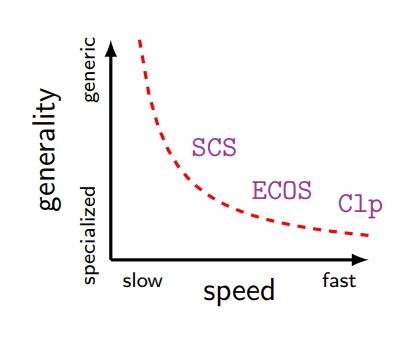
CLP is written specifically to solve linear programs, so it does so with the highest efficiency. ECOS bo comparison is more general in that it solves second order cone problems, and LP⊆SOCP⊆SDP. The last point leads us to the conclusion that SCS should be slower than either Clp or ECOS, and experiment deminstrates this to be the case.
